In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [3]:
newdata1 = pd.read_pickle('data7.pkl')

In [4]:
newdata1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42536,10149342,12000897.0,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,team leadern customer ops & systems,10+ years,OWN,55000.0,Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,debt consolidation,481xx,MI,22.87,0.0,Oct-1986,0.0,0.0,14.0,0.0,36638.0,61.2%,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,Feb-2016,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42537,10159584,12011200.0,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,medical assistant,1 year,RENT,26000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > While being in ...,debt_consolidation,debt consilation,927xx,CA,25.12,0.0,Jan-2007,0.0,0.0,12.0,0.0,7967.0,52.8%,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42538,10159498,1319523.0,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,manager information delivery,10+ years,MORTGAGE,105000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,Unavailable,debt_consolidation,universal card,060xx,CT,14.05,0.0,Mar-1994,1.0,43.0,12.0,0.0,13168.0,21.6%,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0
42539,10139658,11991209.0,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,on road manager,10+ years,RENT,40000.0,Source Verified,Dec-2013,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Unavailable,debt_consolidation,debt consolidation,871xx,NM,16.94,0.0,Oct-1998,0.0,53.0,7.0,2.0,5572.0,68.8%,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,isthisrelevant?,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0
42540,10159548,12011167.0,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,aircraft maintenance engineer,2 years,MORTGAGE,63000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/31/13 > To pay Home Dep...,debt_consolidation,pay off,334xx,FL,16.51,0.0,Mar-1998,0.0,34.0,8.0,0.0,11431.0,74.2%,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0


In [5]:
newdata1.shape

(816676, 54)

In [6]:
newdata1.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,8.166760e+05,8.166760e+05,816676.000000,816676.000000,816676.000000,816676,816676.000000,816676.000000,816676,816676,816676,816676,816676,8.166760e+05,816676,816676,816676,816676,816676,816676,816676,816676,816676,816676,816676.000000,816676.000000,816676,816676.000000,816676.000000,816676.000000,816676.000000,8.166760e+05,816676,816676.000000,816676,816676.000000,816676.000000,816676.000000,816676.000000,816676.000000,816676.000000,816676.000000,816676.000000,816676.000000,816676.000000,816676,816676,816676.000000,816676.0,816676,816676.000000,8.166760e+05,8.166760e+05,8.166760e+05
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,226019,12,6,NaN,3,41,8,2,816676,78395,14,32061,932,51,NaN,NaN,694,NaN,NaN,NaN,NaN,NaN,1260,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,42,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B4,unavailable,10+ years,MORTGAGE,NaN,Source Verified,Oct-2015,Current,n,https://www.lendingclub.com/browse/loanDetail....,Unavailable,debt_consolidation,debt consolidation,945xx,CA,NaN,NaN,Aug-2001,NaN,NaN,NaN,NaN,NaN,0%,NaN,w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feb-2016,Jan-2016,NaN,NaN,INDIVIDUAL,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,566732,NaN,NaN,232658,51146,47102,274515,412108,NaN,311557,48618,597920,816670,1,737029,488987,427350,8861,117186,NaN,NaN,6253,NaN,NaN,NaN,NaN,NaN,2280,NaN,430329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549969,705760,NaN,NaN,816165,NaN,NaN,NaN,NaN
mean,3.518131e+07,3.791965e+07,14998.578414,14998.559802,14992.244276,NaN,13.303486,443.517237,NaN,NaN,NaN,NaN,NaN,7.554491e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.486578,0.328234,NaN,0.670899,16.947678,11.706237,0.208089,1.714588e+04,NaN,25.511847,NaN,9104.531243,9100.896983,7107.940430,7104.750897,5374.256151,1693.261561,0.321761,40.100958,4.265440,2102.338721,NaN,NaN,0.015616,1.0,NaN,0.005415,2.257474e+02,1.394304e+05,3.207682e+04
std,2.174566e+07,2.289324e+07,8446.301097,8446.280368,8442.943209,NaN,4.407073,244.305722,NaN,NaN,NaN,NaN,NaN,6.530910e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.760426,0.883545,NaN,0.958521,22.952113,5.352645,0.601501,2.267197e+04,NaN,11.853372,NaN,8484.404862,8480.927287,7567.860887,7564.080687,6421.635528,2006.504670,3.695662,373.746478,52.734821,4790.956892,NaN,NaN,0.139768,0.0,NaN,0.080848,1.031403e+04,1.537060e+05,3.749261e+04
min,5.670500e+04,7.082500e+04,1000.000000,1000.000000,900.000000,NaN,5.320000,23.260000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000e+00,NaN,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,1.0,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.280649e+07,1.467755e+07,8400.000000,8400.000000,8400.000000,NaN,9.990000,266.830000,NaN,NaN,NaN,NaN,NaN,4.600000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.190000,0.000000,NaN,0.000000,0.000000,8.000000,0.000000,6.597000e+03,NaN,17.000000,NaN,1153.997500,1153.375000,1769.500000,1768.800000,1109.775000,422.370000,0.000000,0.000000,0.000000,281.620000,NaN,NaN,0.000000,1.0,NaN,0.000000,0.000000e+00,2.985100e+04,1.400000e+04
50%,3.852607e+07,4.130969e+07,13500.000000,13500.000000,13500.000000,NaN,12.990000,388.110000,NaN,NaN,NaN,NaN,NaN,6.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,N

## Dropping some more irrelevant columns

In [4]:
# the id columns are of no value
newdata1.drop(axis=1,columns=['id', 'member_id'],inplace=True)

In [5]:
# the payment plan information is highly skewed with only a handful of yes, so dropping this
newdata1.drop(axis=1,columns=['pymnt_plan'],inplace=True)

In [6]:
# doing likewise for policy code
newdata1.drop(axis=1,columns=['policy_code'],inplace=True)

In [7]:
# the followingcolumns with string values are not of much use
# url, description, title
newdata1.drop(axis=1,columns=['url','desc','title'],inplace=True)

In [11]:
# we're not doing any analysis in relation to the 
# url, description, title
# newdata1.drop(axis=1,columns=['url','desc','title'],inplace=True)

## Beginning work on the target variable for classification

In [8]:
newdata1['loan_status'].value_counts()

Current               597920
Fully Paid            153924
Charged Off            35201
Late (31-120 days)     11461
Issued                  8457
In Grace Period         6185
Late (16-30 days)       2328
Default                 1200
Name: loan_status, dtype: int64

In [9]:
# combining charged off, late (both categories) and default as BAD (1) , and rest as GOOD (0)
newdata1 = newdata1.replace({'loan_status' : {'Current' : 0, 'Fully Paid' : 0, 'Charged Off' : 1,\
                                              'Late (31-120 days)' : 1, 'Issued' : 0, 'In Grace Period' : 0,\
                                             'Late (16-30 days)' : 1, 'Default' : 1}})

In [10]:
newdata1['loan_status'].value_counts()

0    766486
1     50190
Name: loan_status, dtype: int64

In [11]:
# calculating baseline for model
float(len(newdata1[newdata1['loan_status']==0]))/len(newdata1['loan_status'])
# this is about 93.8%

0.9385435595021772

In [12]:
newdata1['DEFAULT'] = newdata1['loan_status']
newdata1.drop(axis=1,columns='loan_status',inplace=True)

Text(0,0.5,u'counts')

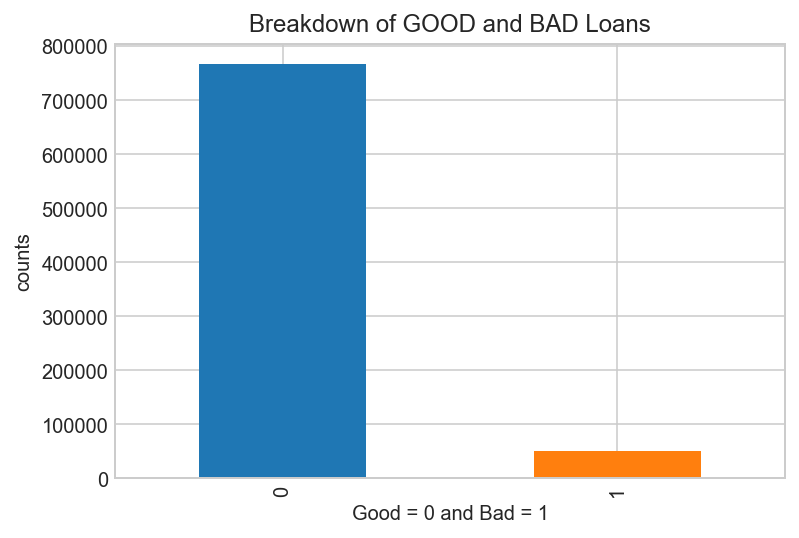

In [34]:
ax = newdata1['loan_status'].value_counts().plot(kind='bar',title='Breakdown of GOOD and BAD Loans')
ax.set_xlabel("Good = 0 and Bad = 1")
ax.set_ylabel("counts")

## Checking the distribution for some of the remaining obscure columns

In [15]:
newdata1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,DEFAULT
42536,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,team leadern customer ops & systems,10+ years,OWN,55000.0,Verified,Dec-2013,debt_consolidation,481xx,MI,22.87,0.0,Oct-1986,0.0,0.0,14.0,0.0,36638.0,61.2%,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,Feb-2016,Dec-2015,0.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,0
42537,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,medical assistant,1 year,RENT,26000.0,Not Verified,Dec-2013,debt_consolidation,927xx,CA,25.12,0.0,Jan-2007,0.0,0.0,12.0,0.0,7967.0,52.8%,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,0
42538,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,manager information delivery,10+ years,MORTGAGE,105000.0,Not Verified,Dec-2013,debt_consolidation,060xx,CT,14.05,0.0,Mar-1994,1.0,43.0,12.0,0.0,13168.0,21.6%,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,0
42539,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,on road manager,10+ years,RENT,40000.0,Source Verified,Dec-2013,debt_consolidation,871xx,NM,16.94,0.0,Oct-1998,0.0,53.0,7.0,2.0,5572.0,68.8%,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,isthisrelevant?,Jan-2016,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,0
42540,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,aircraft maintenance engineer,2 years,MORTGAGE,63000.0,Not Verified,Dec-2013,debt_consolidation,334xx,FL,16.51,0.0,Mar-1998,0.0,34.0,8.0,0.0,11431.0,74.2%,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,0


In [16]:
newdata1.shape

(816676, 47)

In [17]:
newdata1.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                     object
total_acc   

In [16]:
# working with just numerical variables for the moment
numfeat = [x for x in newdata1.columns if newdata1[x].dtype != object]
objfeat = [x for x in newdata1.columns if newdata1[x].dtype == object]

In [17]:
newdata2 = newdata1[numfeat]

In [18]:
newdata2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,DEFAULT
42536,27050.0,27050.0,27050.0,10.99,885.46,55000.0,22.87,0.0,0.0,0.0,14.0,0.0,36638.0,27.0,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,0.0,0.0,0.0,114834.0,59900.0,0
42537,9750.0,9750.0,9750.0,13.98,333.14,26000.0,25.12,0.0,0.0,0.0,12.0,0.0,7967.0,28.0,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,0.0,0.0,0.0,14123.0,15100.0,0
42538,12000.0,12000.0,12000.0,6.62,368.45,105000.0,14.05,0.0,1.0,43.0,12.0,0.0,13168.0,22.0,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,0.0,0.0,267646.0,61100.0,0
42539,12000.0,12000.0,12000.0,13.53,407.40,40000.0,16.94,0.0,0.0,53.0,7.0,2.0,5572.0,32.0,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,0.0,0.0,15386.0,13605.0,8100.0,0
42540,15000.0,15000.0,15000.0,8.90,476.30,63000.0,16.51,0.0,0.0,34.0,8.0,0.0,11431.0,29.0,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,0.0,1514.0,272492.0,15400.0,0


In [19]:
newdata3 = newdata1[objfeat]
newdata3.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,next_pymnt_d,last_credit_pull_d,application_type
42536,36 months,B,B2,team leadern customer ops & systems,10+ years,OWN,Verified,Dec-2013,debt_consolidation,481xx,MI,Oct-1986,61.2%,w,Feb-2016,Dec-2015,INDIVIDUAL
42537,36 months,C,C1,medical assistant,1 year,RENT,Not Verified,Dec-2013,debt_consolidation,927xx,CA,Jan-2007,52.8%,f,Feb-2016,Jan-2016,INDIVIDUAL
42538,36 months,A,A2,manager information delivery,10+ years,MORTGAGE,Not Verified,Dec-2013,debt_consolidation,060xx,CT,Mar-1994,21.6%,w,Feb-2016,Jan-2016,INDIVIDUAL
42539,36 months,B,B5,on road manager,10+ years,RENT,Source Verified,Dec-2013,debt_consolidation,871xx,NM,Oct-1998,68.8%,w,isthisrelevant?,Jan-2016,INDIVIDUAL
42540,36 months,A,A5,aircraft maintenance engineer,2 years,MORTGAGE,Not Verified,Dec-2013,debt_consolidation,334xx,FL,Mar-1998,74.2%,w,Feb-2016,Jan-2016,INDIVIDUAL


## Starting EDA

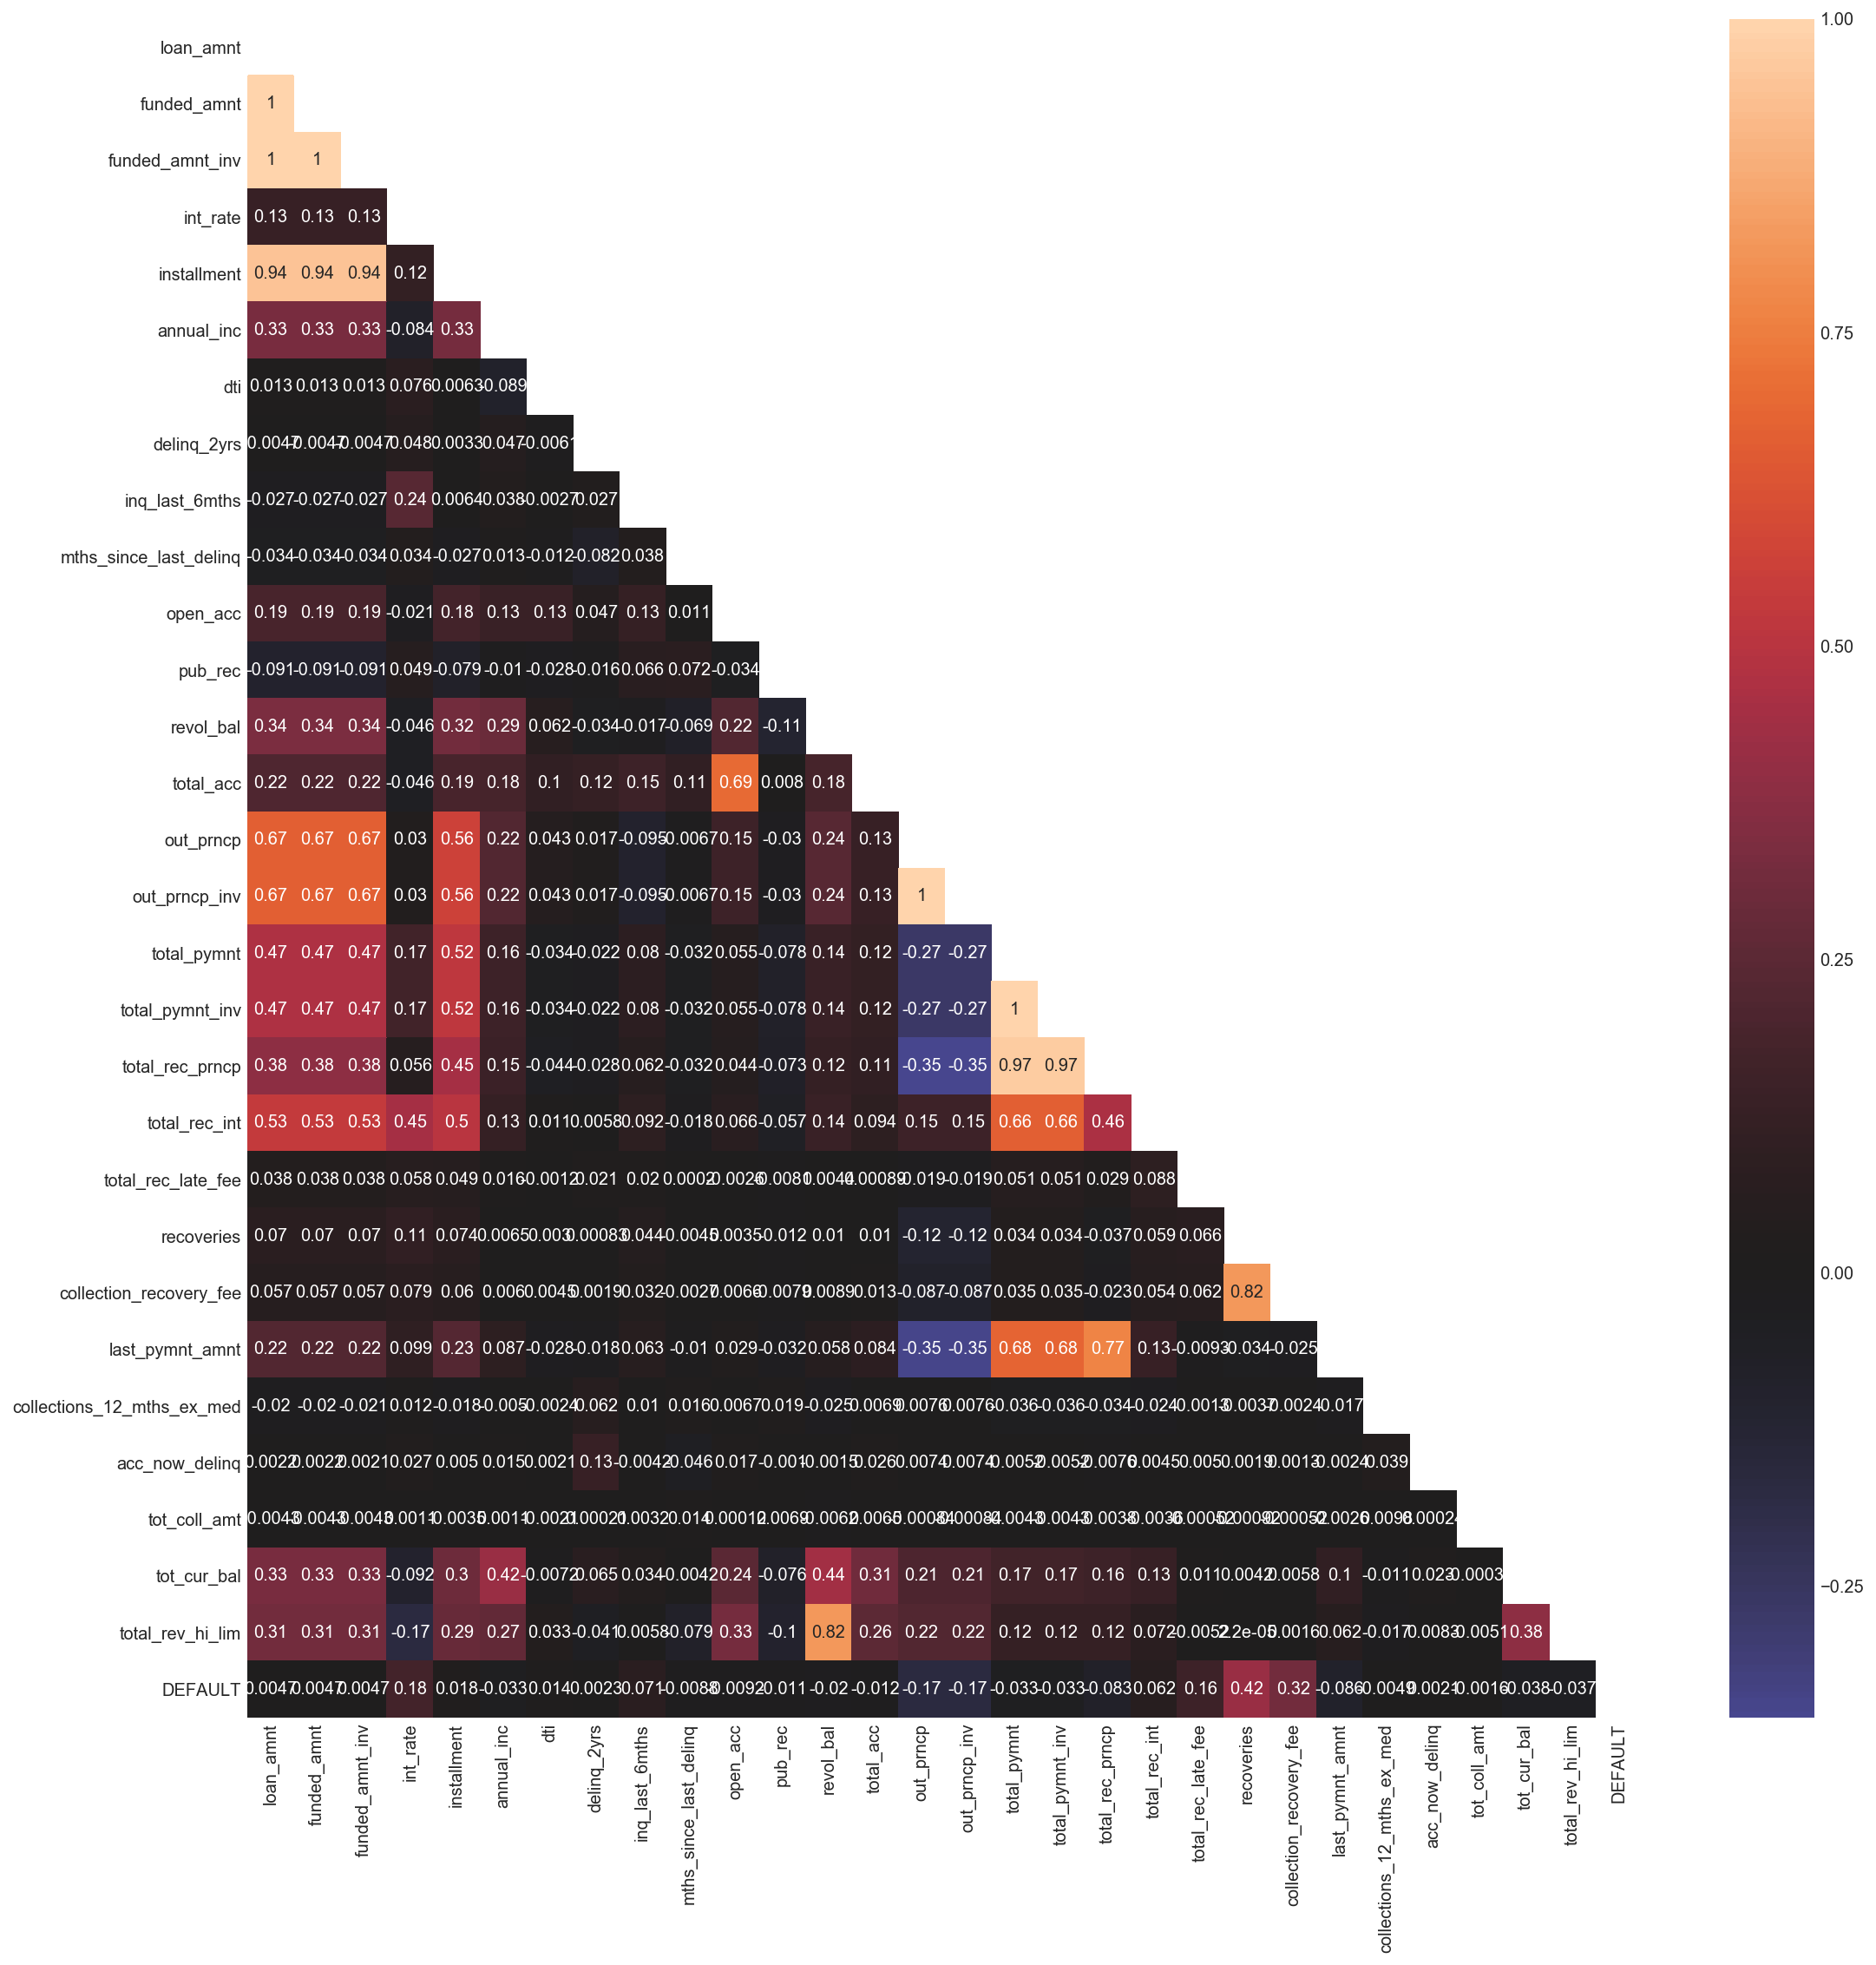

In [24]:
# getting an initial view on correlations
corr = newdata2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 18))
fig1 = sns.heatmap(corr, annot=True, center=0, mask=mask)

In [25]:
corr = newdata2.corr()
corr.sort_values(['DEFAULT'], ascending = False, inplace = True)
print(corr.DEFAULT)

DEFAULT                       1.000000
recoveries                    0.419297
collection_recovery_fee       0.316090
int_rate                      0.175336
total_rec_late_fee            0.156250
inq_last_6mths                0.070997
total_rec_int                 0.061688
installment                   0.017823
dti                           0.013717
loan_amnt                     0.004717
funded_amnt_inv               0.004714
funded_amnt                   0.004711
delinq_2yrs                   0.002342
acc_now_delinq                0.002096
tot_coll_amt                 -0.001647
collections_12_mths_ex_med   -0.004916
mths_since_last_delinq       -0.008823
open_acc                     -0.009215
pub_rec                      -0.010637
total_acc                    -0.011838
revol_bal                    -0.020086
annual_inc                   -0.032814
total_pymnt                  -0.033310
total_pymnt_inv              -0.033311
total_rev_hi_lim             -0.037390
tot_cur_bal              

### Checking data and relationships associated with loan amount

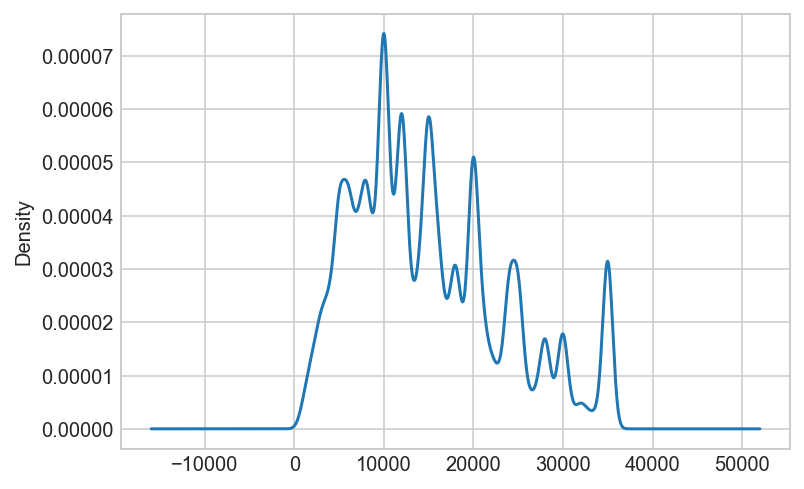

In [29]:
# plotting distribution of loan amounts
newdata1['loan_amnt'].plot.kde()

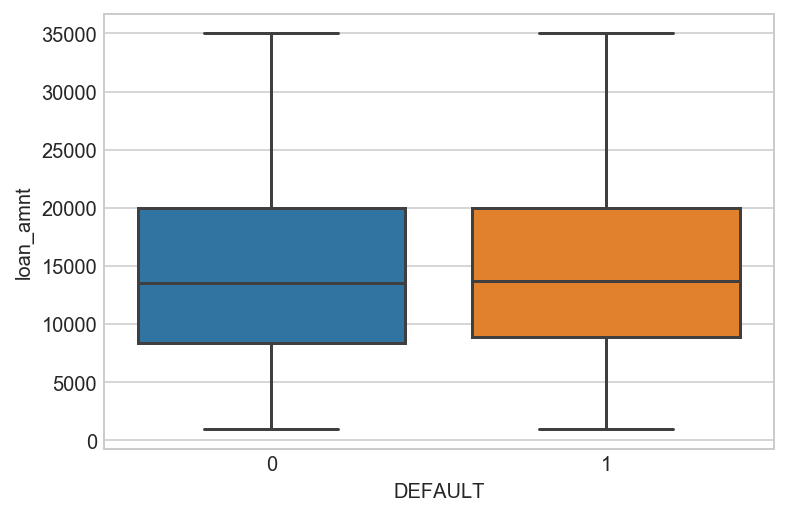

In [49]:
# plotting relationship between default and loan amount
sns.boxplot(x=newdata1['DEFAULT'], y=newdata1['loan_amnt'])

### Checking distributions and relationships associated with interest rate

DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: int_rate, dtype: object

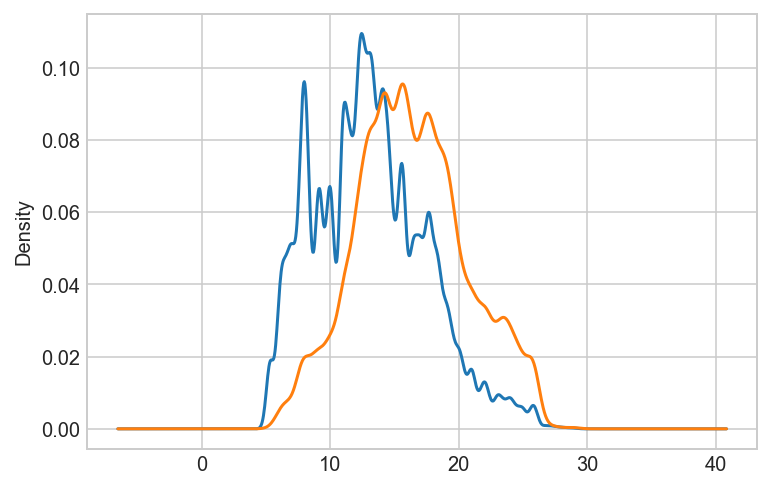

In [47]:
# plotting distributions of interest rate and default
newdata1.groupby('DEFAULT').int_rate.plot(kind='kde')

### Checking distributions and relationships associated with annual income

DEFAULT
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: annual_inc, dtype: object

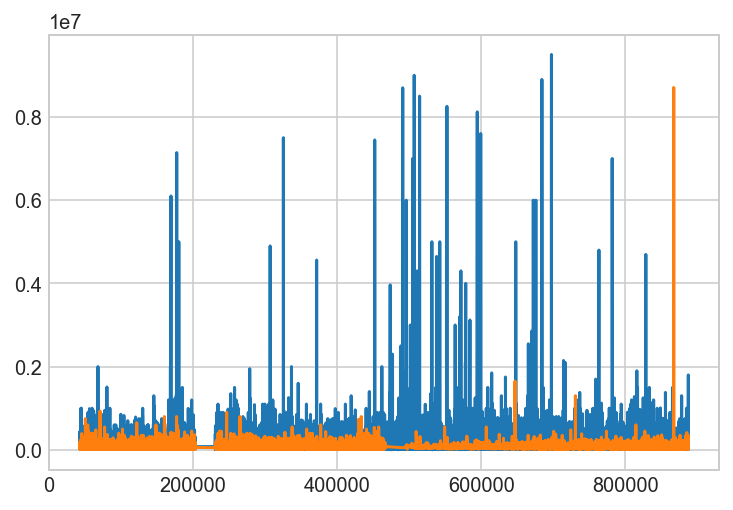

In [72]:
# plotting distributions of interest rate and default
newdata1.groupby('DEFAULT').annual_inc.plot(kind='line')

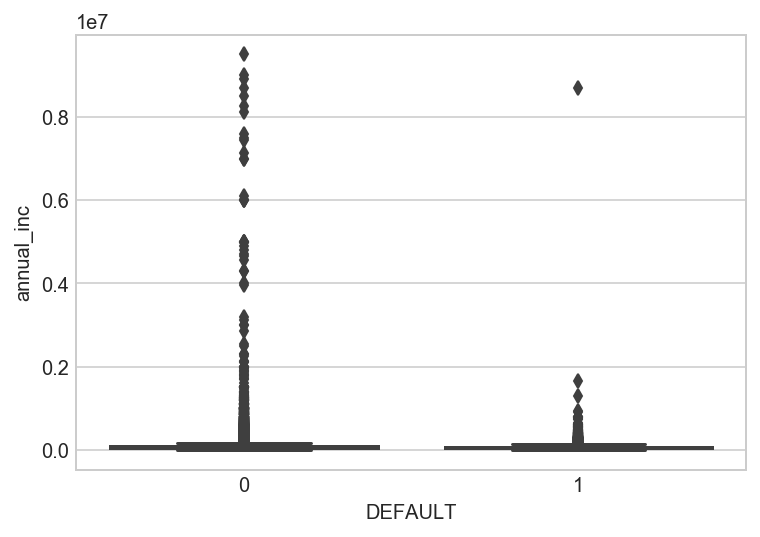

In [38]:
# plotting relationship between default and annual income
sns.boxplot(x=newdata1['DEFAULT'], y=newdata1['annual_inc'])

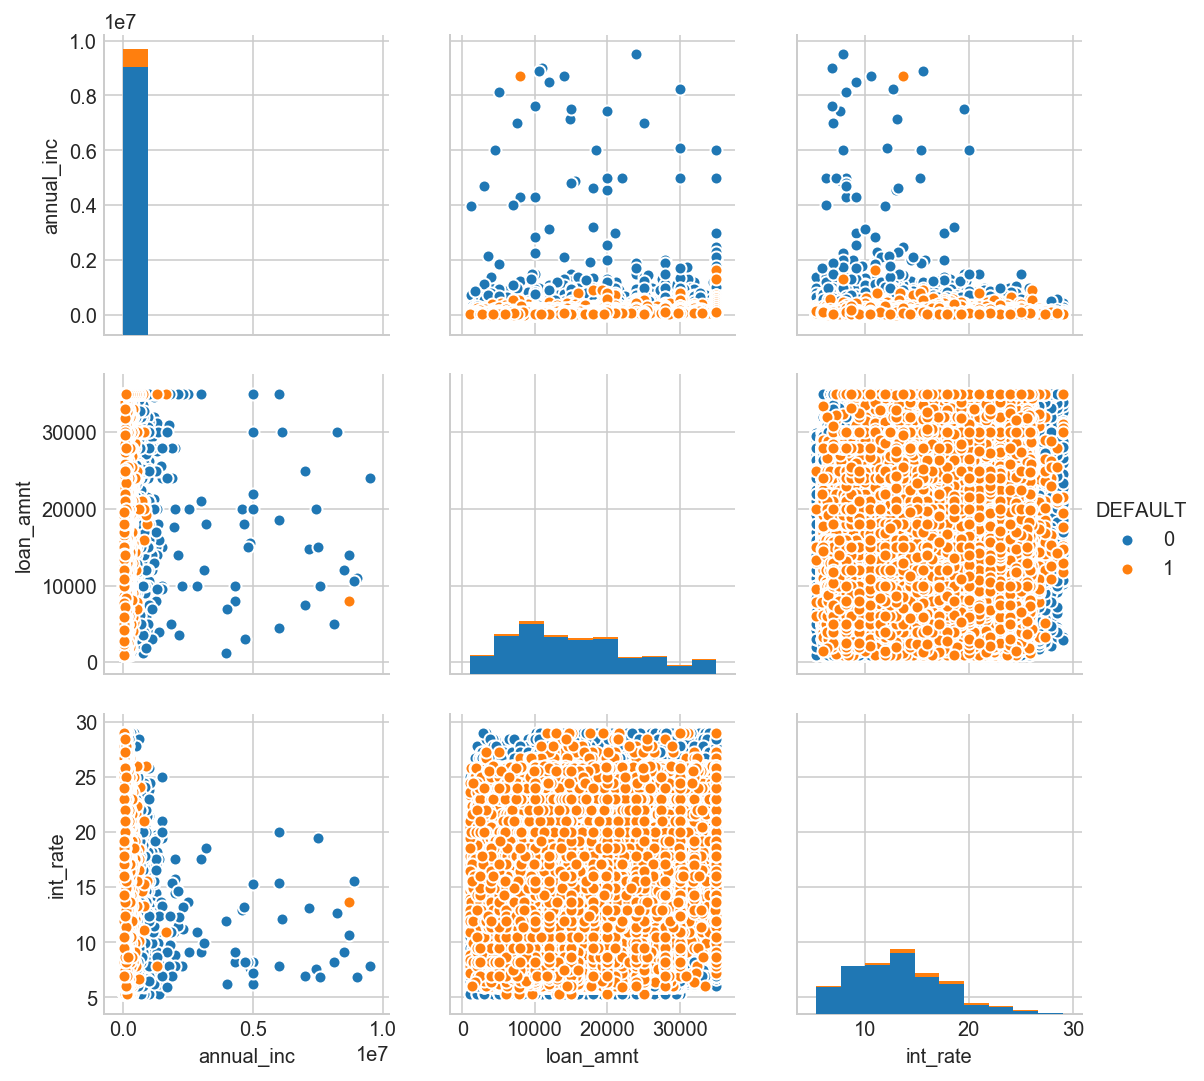

In [41]:
# plotting relationship between loan amount, interest rate, and annual income
g = sns.pairplot(newdata1, vars=['annual_inc', 'loan_amnt','int_rate'],hue='DEFAULT')

### Checking distribution associated with length of employment

In [ ]:
fig = plt.figure()

ax = fig.add_subplot()
width = 0.4

newdata1[newdata1['DEFAULT']==1].plot(kind='bar', color='red', ax=ax, width=width, position=1)
newdata1[newdata1['DEFAULT']==0].plot(kind='bar', color='blue', ax=ax, width=width, position=0)

ax.set_ylabel('counts')

plt.show()

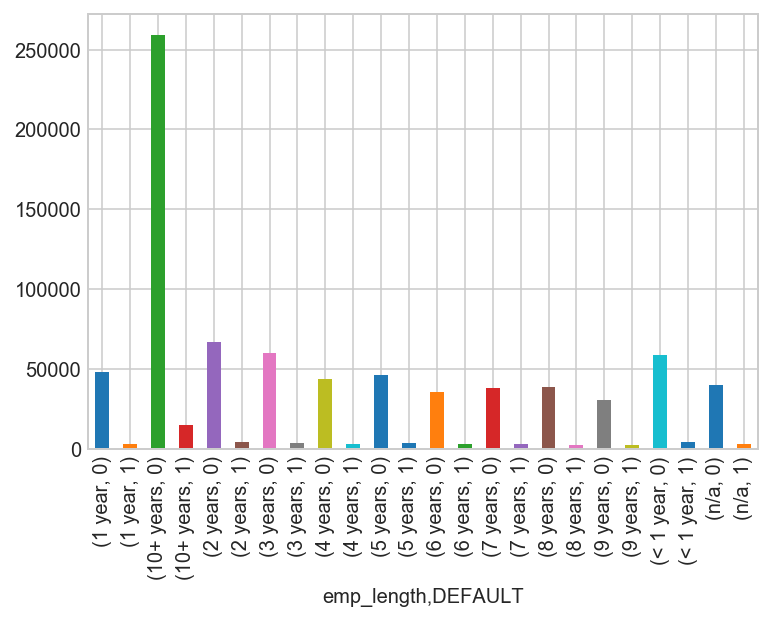

In [63]:
newdata1.groupby(['emp_length','DEFAULT'])['DEFAULT'].count().plot(kind='bar')

### Checking distribution associated with credit grade

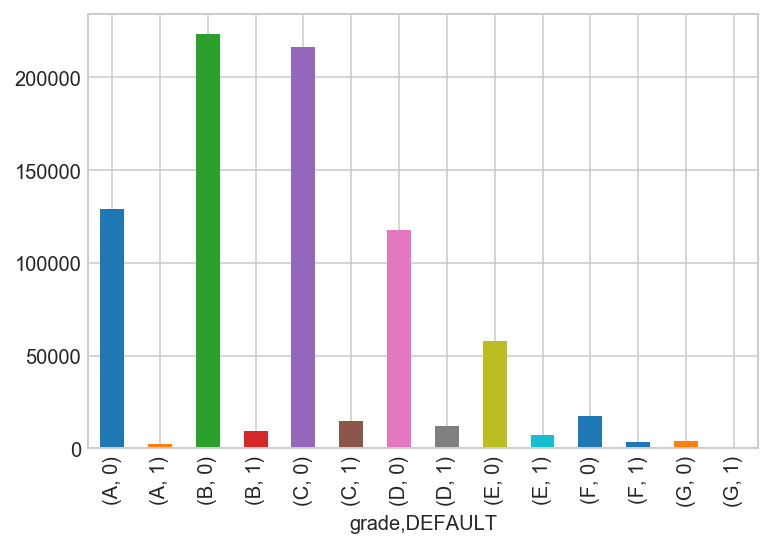

In [62]:
newdata1.groupby(['grade','DEFAULT'])['DEFAULT'].count().plot(kind='bar')

### Checking distribution associated with term of loan

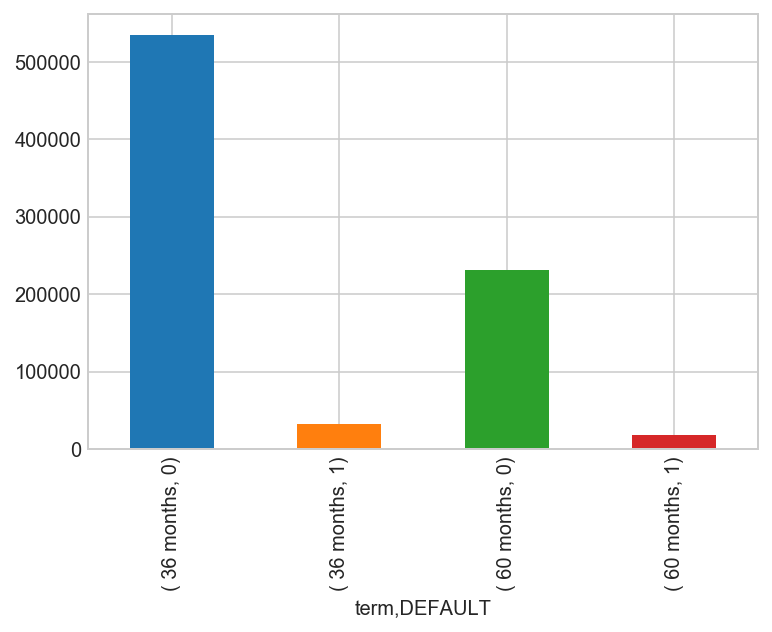

In [65]:
newdata1.groupby(['term','DEFAULT'])['DEFAULT'].count().plot(kind='bar')

### Checking distribution associated with home ownership

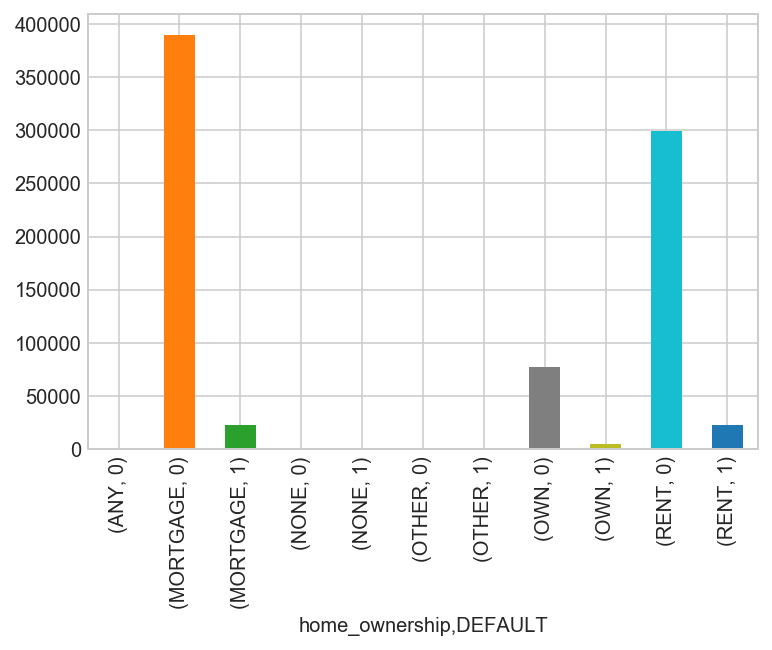

In [64]:
newdata1.groupby(['home_ownership','DEFAULT'])['DEFAULT'].count().plot(kind='bar')

In [ ]:
fig, axs = plt.subplots(10, 10)

# basic plot
axs[0, 0].boxplot(newdata2)
#newdata2.plot(kind='box')

KeyboardInterrupt: 

### Checking distributions and relationships associated with credit grade

In [43]:
# newdata1.groupby('grade').DEFAULT.plot(kind='bar')

In [ ]:
#newdata1.groupby('emp_length').DEFAULT.plot(kind='bar')

In [ ]:
#newdata1.groupby('home_ownership').DEFAULT.plot(kind='bar')

In [ ]:
#out_prncp, out_prncp_inv


## Trial modelling

### Classification of good/bad loans

In [19]:
# random sampling of data for now to manage size
newdata2s = newdata2.sample(frac=0.01, replace=False)

In [23]:
newdata2s.shape

(8167, 30)

In [20]:
# define target and predictor variables
X = newdata2s.loc[:, newdata2s.columns != 'DEFAULT']
y = newdata2s['DEFAULT']

In [21]:
# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
rs = RobustScaler()
Xs = rs.fit_transform(X)

In [26]:
# split into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xs,y,test_size=0.2,random_state=123,stratify=y)

In [62]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [64]:
logit = LogisticRegression(penalty='l2',C=1.0,random_state=123, solver='saga')
model = logit.fit(X_train, y_train)

In [65]:
print "Logistic Regression Score:\t", cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1,verbose=1).mean()

Logistic Regression Score:	

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


0.7890913303181729


In [66]:
# linear SVM (to try kernel SVM later)
from sklearn import svm
from sklearn.svm import SVC

In [67]:
lin_clf = svm.LinearSVC(C=1.0, loss='hinge', penalty='l2', random_state=123, verbose=1)
model = lin_clf.fit(X_train, y_train)

[LibLinear]

C:\Users\arb_b\Anaconda2\lib\site-packages\sklearn\svm\base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [68]:
print "SVM Score:\t", cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1,verbose=1).mean()

SVM Score:	

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished


0.9788173598348916


In [69]:
# Decision Tree and Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [74]:
dtc = DecisionTreeClassifier()
model = dtc.fit(X_train, y_train)

In [75]:
cross_val_score(model, X_test, y_test, cv=10, scoring='roc_auc').mean()

0.8345147465508302

In [71]:
print "Decision Tree Score:\t", cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1,verbose=1).mean()

Decision Tree Score:	

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.1s finished


0.9564710298054958


In [72]:
clf = DecisionTreeClassifier()
bagger = BaggingClassifier(clf)
model = bagger.fit(X_train, y_train)

In [73]:
print "Random Forest Score:\t", cross_val_score(bagger, X_test, y_test, cv=10, n_jobs=-1,verbose=1).mean()

Random Forest Score:	

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.3min finished


0.9783274640294559


In [79]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

In [81]:
adb = AdaBoostClassifier()
model = adb.fit(X_train, y_train)

In [82]:
print "Ada Boost Score:\t", cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1,verbose=1).mean()

Ada Boost Score:	

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  5.1min finished


0.9764911411058099


In [76]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gdb = GradientBoostingClassifier()
model = gdb.fit(X_train, y_train)

In [78]:
print "Gradient Boost Score:\t", cross_val_score(model, X_test, y_test, cv=10, n_jobs=-1,verbose=1).mean()

Gradient Boost Score:	0.976613577603354


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.0min finished


In [ ]:
# placeholder for gridsearch
# dtc_params = {
#     'max_depth':[None,1,2,3,4],
#     'max_features':[None,'log2','sqrt',2,3,4,5],
#     'min_samples_split':[2,3,4,5,10,15,20,25,30,40,50]
# }

# from sklearn.model_selection import GridSearchCV
# # set the gridsearch
# dtc_gs = GridSearchCV(DecisionTreeClassifier(), 
#                       dtc_params, 
#                       cv=5, 
#                       verbose=1, 
#                       scoring='roc_auc', 
#                       n_jobs=-1)

In [ ]:
# dtc_gs.fit(X, y)
# dtc_best = dtc_gs.best_estimator_
# print dtc_gs.best_params_
# print dtc_gs.best_score_

### Clustering

In [22]:
# start with kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
k_mean = KMeans() #default k=8
k_mean.fit(Xs)
labels = k_mean.labels_

In [24]:
print "K means silhouette Score:\t", silhouette_score(Xs, labels)

K means silhouette Score:	0.9310442775514579


In [25]:
# DBSCAN for clustering
from sklearn.cluster import DBSCAN

In [30]:
dbscan = DBSCAN(eps=0.8,min_samples = 10,n_jobs=-1)
dbscan.fit(Xs)
labels = dbscan.labels_

In [31]:
print "DBSCAN silhouette Score:\t", silhouette_score(Xs, labels)

DBSCAN silhouette Score:	-0.8644445050771048


In [39]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

In [40]:
aggc = AgglomerativeClustering(affinity='euclidean')
aggc.fit(Xs)
labels = aggc.labels_

In [41]:
print "Hierarchichal Clustering silhouette Score:\t", silhouette_score(Xs, labels)

Hierarchichal Clustering silhouette Score:	0.9682889863410226


In [14]:
newdata1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,DEFAULT
42536,27050.0,27050.0,27050.0,36 months,10.99,885.46,B,B2,team leadern customer ops & systems,10+ years,OWN,55000.0,Verified,Dec-2013,debt_consolidation,481xx,MI,22.87,0.0,Oct-1986,0.0,0.0,14.0,0.0,36638.0,61.2%,27.0,w,10018.90,10018.90,21251.04,21251.04,17031.10,4219.94,0.0,0.0,0.0,885.46,Feb-2016,Dec-2015,0.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,0
42537,9750.0,9750.0,9750.0,36 months,13.98,333.14,C,C1,medical assistant,1 year,RENT,26000.0,Not Verified,Dec-2013,debt_consolidation,927xx,CA,25.12,0.0,Jan-2007,0.0,0.0,12.0,0.0,7967.0,52.8%,28.0,f,3710.96,3710.96,7994.83,7994.83,6039.04,1955.79,0.0,0.0,0.0,333.14,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,0
42538,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,manager information delivery,10+ years,MORTGAGE,105000.0,Not Verified,Dec-2013,debt_consolidation,060xx,CT,14.05,0.0,Mar-1994,1.0,43.0,12.0,0.0,13168.0,21.6%,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,0
42539,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,B5,on road manager,10+ years,RENT,40000.0,Source Verified,Dec-2013,debt_consolidation,871xx,NM,16.94,0.0,Oct-1998,0.0,53.0,7.0,2.0,5572.0,68.8%,32.0,w,0.00,0.00,13359.77,13359.77,11999.99,1359.78,0.0,0.0,0.0,119.17,isthisrelevant?,Jan-2016,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,0
42540,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,aircraft maintenance engineer,2 years,MORTGAGE,63000.0,Not Verified,Dec-2013,debt_consolidation,334xx,FL,16.51,0.0,Mar-1998,0.0,34.0,8.0,0.0,11431.0,74.2%,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,Feb-2016,Jan-2016,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,0


In [15]:
import pickle

In [16]:
pd.to_pickle(newdata1,'dataupdate28042018.pkl')